In [15]:
import numpy as np
from sklearn.decomposition import PCA
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [160]:
pca = PCA(n_components=2)

In [195]:
import csv
groupDict = {}
with open('AraNet_GS_decomposed.tsv','r') as tsv:
    for line in tsv:
        row = line.strip().split('\t')
        groupDict[row[0]] = int(row[1],10)
        
dataVec = np.array([],dtype='float')
colorVec = np.array([],dtype='float')
with open('arabi.tsv','r') as tsv:
    for line in tsv:
        fields = line.strip().split('\t')
        gene = fields[0]
        dataRow = np.array(fields[1:7],dtype='float')
        if np.sum(np.where(dataRow<.001,0,1)) > 3:  
            dataVec = np.append(dataVec,np.log(np.maximum([1e-3],dataRow)))
            if gene in groupDict:
                colorVec = np.append(colorVec,np.array(groupDict[gene]))
            else:
                colorVec = np.append(colorVec,np.array(0))
            
dataVec = np.reshape(dataVec,[-1,6])
colorVec = np.reshape(colorVec,[-1])

In [196]:
components = pca.fit(dataVec).components_

In [197]:
pca.fit(np.array(dataVec)).explained_variance_

array([26.86625411,  5.57532368])

In [198]:
dots = np.matmul(components,np.transpose(np.float64(dataVec)))

ValueError: c of shape (5555,) not acceptable as a color sequence for x with size 22267, y with size 22267

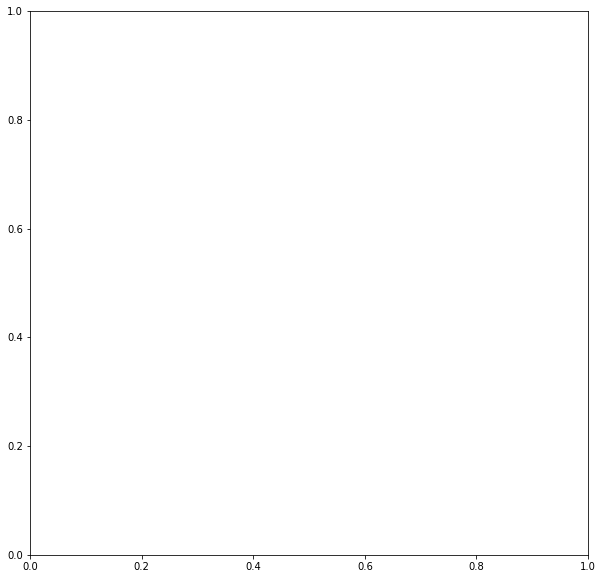

In [199]:
plt.rcParams['figure.figsize'] = [10,10]
plt.scatter(np.extract(dots[0,:],colorVec>np.array(0)),np.extract(dots[1,:],colorVec>np.array(0)),s=1,c=np.extract(colorVec>np.array(0),colorVec))

In [210]:
colorVec[0:20]

array([1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0.])

In [177]:
np.sum(np.where(colorVec>1,1,0))

TypeError: '>' not supported between instances of 'numpy.ndarray' and 'int'